# MSO4357 Coursework

The aim of the assignment is to demonstrate that you have understood the principles of the supervised learning algorithms, and have the skills of using the machine learning libraries on a real application task.
The task is to train classifiers with the MNIST dataset and improve their performance, in Colab using the Python programming language.

You need to:
## Import the relevant libraries (e.g., Numpy, Scikit-learn).

In [46]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")

## Download the dataset MNIST.


Data Description MNIST data, which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label.

Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features. 




In [47]:
data = pd.read_csv("mnist_digits.csv") #reading the csv files using pandas


In [48]:
data.shape # print the dimension or shape of dataset

(70000, 785)

### Dataset Description
The dataset consists of 70,000 images of 28x28 pixel. Thus, total number of featrues become 784. The first column is 'label' which is the actual digit in the image, followed by 784 columns, each column representing each feature of 28x28 features. 

In [81]:
data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.2 MB


Checking first 5 rows of our dataframe

In [49]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking missing values in the training and test dataset. 


In [50]:
print(data.isnull().sum().head(10))
# There is no missing values in the complete dataset.

label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64


Retrieving unique label values in the dataset.

In [52]:
# Checking unique values for labels in the dataset.
list(np.sort(data['label'].unique()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

There are total 10 unique values of digits in the dataset.

Plotting count of every digit in the dataset.

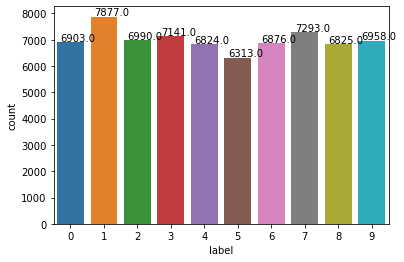

In [53]:
## Visualizing the number of digits and respective counts
plt = sns.countplot(data["label"])
for p in plt.patches:
        plt.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Separating Descriptive and Target Feature.

### Extracting Descriptive and Target features

In [55]:
#1st column i.e. label is the target feature
target_feature = data.iloc[: , :1]

#All features except the 'label' column
descriptive_features = data.iloc[: , 1:]

## Printing the size of data 
print(descriptive_features.shape,target_feature.shape)

(70000, 784) (70000, 1)


## Split the dataset to training set and testing set.

Splitting Datasets in to training and testing datasets. As a daily life practice of Machine Learning, we can split the complete dataset in to Training subset of *60-80%* and  Test Subset of *20-40%*. We are splitting the data in to 70-30%. Hence we will get the training subset of 49,000 records and Test set of 21,000 images. 

In [56]:
# scaling the features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

descriptive_features_scaled = scale(descriptive_features)

# train test split
X_train, X_test, y_train, y_test = train_test_split(descriptive_features_scaled, target_feature, test_size = 0.3,random_state = 10)

In [57]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(49000, 784) (21000, 784) (49000, 1) (21000, 1)


## Train three classifiers (SVM, K- Neighbours, Random forest).


## SVM - Support vector machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

***The advantages of support vector machines are:***

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

***The disadvantages of support vector machines include:***

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


### **Model Building**

Building Linear SVM model with default hyperparameters

In [58]:
# linear model

model_linear = SVC(kernel='linear',probability=True)
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

### Confusion matrix and accuracy

In [59]:
# confusion matrix and accuracy


from sklearn import metrics
from sklearn.metrics import confusion_matrix

# accuracy of SVM Linear
accuracy_svm_Linear = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("accuracy:",accuracy_svm_Linear , "\n")

# confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.921047619047619 

[[2045    0   10    4    2   19   21    0    7    4]
 [   0 2244    9    4    2    7    1    5   12    0]
 [  24   30 1919   42   27    7   11   24   29    4]
 [   7   18   44 1975    4   53    3   17   27   12]
 [  10    4   39    3 1897    3    8   10    6   58]
 [  34   17   21   74   16 1648   23    2   39    7]
 [  15    6   28    0   18   37 1902    0    3    0]
 [   5    9   34   21   34    6    2 2076    7   59]
 [  15   40   46   67   14   57   22    3 1773   20]
 [   7    8   17   20   82   12    0   60   20 1863]]


## K-Nearest Neighbours 

The k-nearest neighbors algorithm, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.


KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power



### Find optimal value of k. 

In [62]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


Computing and plotting accuracy scores for different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you can develop an intuition for overfitting and underfitting a model.


In [63]:
from sklearn.neighbors import KNeighborsClassifier 
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


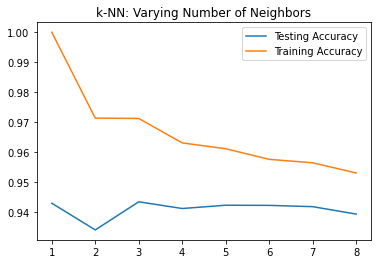

In [64]:
# Generate plot
import matplotlib.pyplot as plt
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel='Number of Neighbors'
plt.ylabel= 'Accuracy'
plt.show()

Ideal number of k is 3.

### Create a k-NN classifier with 3 neighbors: knn

In [65]:
# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

In [66]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Predicitng labels for Test dataset

In [67]:
y_pred = knn.predict(X_test)

### Confusion matrix and accuracy

In [69]:
# accuracy
accuracy_knn = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("accuracy:",accuracy_knn , "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9434285714285714 

[[2081    1    5    4    0    5   11    1    3    1]
 [   0 2264    7    2    2    1    6    2    0    0]
 [  20   26 1978   33    9    3   12   20   12    4]
 [   5    4   30 2039    1   25    3   23   22    8]
 [   4   20   20    9 1893    4    8    5    7   68]
 [  13    4    5   48    6 1744   32    6   13   10]
 [  18    4    7    1    7   12 1957    0    3    0]
 [   4   29   14    7   25    1    0 2102    0   71]
 [  15   35   19   46   18   59   12    5 1827   21]
 [   7    3   10   25   41    4    0   69    3 1927]]


## Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**Advantages of random forest**

It can perform both regression and classification tasks. A random forest produces good predictions that can be understood easily. It can handle large datasets efficiently. The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.

In [70]:
#training random Forest
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

### Confusion matrix and accuracy

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, y_pred))
print ("Confusion Report")
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2112
           1       0.98      0.99      0.99      2284
           2       0.96      0.96      0.96      2117
           3       0.96      0.95      0.96      2160
           4       0.96      0.97      0.96      2038
           5       0.96      0.96      0.96      1881
           6       0.97      0.98      0.98      2009
           7       0.97      0.96      0.97      2253
           8       0.95      0.95      0.95      2057
           9       0.95      0.95      0.95      2089

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000

Confusion Report
[[2083    0    3    0    1    3    8    1   12    1]
 [   0 2255    8    6    1    5    3    2    2    2]
 [  13    1 2040    7   10    2    4   17   20    3]
 [   3    2   30 2062    4   14    2   21  

In [72]:
# accuracy
accuracy_RF = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print("accuracy:",accuracy_RF , "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9657142857142857 

[[2083    0    3    0    1    3    8    1   12    1]
 [   0 2255    8    6    1    5    3    2    2    2]
 [  13    1 2040    7   10    2    4   17   20    3]
 [   3    2   30 2062    4   14    2   21   17    5]
 [   5    1    6    0 1967    0   10    5    6   38]
 [   5    6    4   28    2 1801   12    3   14    6]
 [   8    4    1    0    6   19 1966    0    5    0]
 [   1    8   21    3   12    0    0 2166    7   35]
 [   5    8   12   12    9   17   10    1 1959   24]
 [   4    5    5   28   27    6    2   18   13 1981]]


## Grid Search: Hyperparameter Tuning - Use grid search with cross-validation to find good hyperparameters.
Grid Search
We try all possible combinations of the parameters of interest and find the best ones

In [73]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'max_depth': np.arange(2, 11),
         'min_samples_leaf': np.arange(2, 11)}
best_tree = GridSearchCV(estimator= rf, param_grid= params, 
                         cv= 5, verbose= True, n_jobs= -1)

In [ ]:
# print out results

best_tree.fit(X_train, y_train)

In [75]:
best_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2}

In [76]:
best_tree.best_score_

0.9447551020408163

In [77]:
# accuracy
best_y_pred = best_tree.predict(X_test)
accuracy_cv = metrics.accuracy_score(y_true=y_test, y_pred=best_y_pred)
print("accuracy:",accuracy_cv , "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=best_y_pred))

accuracy: 0.9444285714285714 

[[2070    0    4    2    0    4   11    2   19    0]
 [   0 2245    9    7    3    5    6    3    3    3]
 [  15    5 1986   17   20    3   10   31   25    5]
 [   4   12   41 2003    8   24    2   23   30   13]
 [   6    0    7    0 1904    1   14    7   12   87]
 [  10   18    5   28    6 1758   16    2   21   17]
 [   9    8    2    0    9   29 1942    0   10    0]
 [   1   15   33    2   15    0    0 2104   12   71]
 [   6   29   16   18   16   19   10    3 1890   50]
 [   7   10    4   32   40    8    2   34   21 1931]]


Conclusion
Grid Search is good when we work with a small number of hyperparameters. However, if the number of parameters to consider is particularly high and the magnitudes of influence are imbalanced, the better choice is to use the Random Search.

## Try to combine these classifiers into an ensemble that outperforms them all on the validation set, using a soft and hard voting classifier.


Voting Classifier with Soft and Hard Voting.

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
voting_clf_soft = VotingClassifier(
    estimators=[('linearsvc', model_linear), ('rf', rf), ('knn', knn)],
    voting='hard')

voting_clf_hard = VotingClassifier(
    estimators=[('linearsvc', model_linear), ('rf', rf), ('knn', knn)],
    voting='soft')



In [79]:
voting_clf_soft.fit(X_train, y_train)
y_pred = voting_clf_soft.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9618095238095238


In [80]:
voting_clf_hard.fit(X_train, y_train)
y_pred = voting_clf_hard.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9635238095238096


## Accuracy Comparison
Following is the comparison of all the classifiers we have trained. 

| **Classifier**      | **Accuracy** |
| ----------- | ----------- |
| SVM      | 92%       |
| K-Neighbours   | 94%        |
| Random Forest  | 96.5%        |
| Soft Voting   | 96.2%       |
| Hard Voting   | 96.3%       |


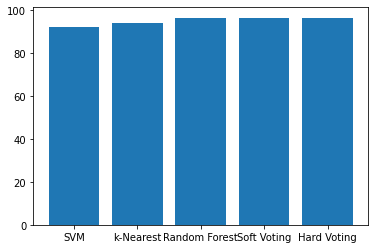

In [86]:
import matplotlib.pyplot as plt

Accuracy_dictionary = {u'SVM':92, u'k-Nearest': 94, u'Random Forest':96.5,u'Soft Voting':96.2,u'Hard Voting':96.3}
plt.bar(*zip(*Accuracy_dictionary.items()))
plt.show()

## Conclusion
According to our analysis, Random Forest classifier, which itself is an Essemble technique performed better than the SVM and K-Neighbours algorithms. The other Ensemble techniques Soft and Hard voting have performance similar to Random Forest Classifier. Grid Search is good when we work with a small number of hyperparameters. However, if the number of parameters to consider is particularly high and the magnitudes of influence are imbalanced, the better choice is to use the Random Search.
 